In [40]:
#import 
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import svm

In [12]:
df = pd.read_csv('Breast_Cancer.csv')
df.head()


,Age,Race,Marital Status,T Stage,N Stage,6th Stage,differentiate,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Reginol Node Positive,Survival Months,Status
0,68,White,Married,T1,N1,IIA,Poorly differentiated,3,Regional,4,Positive,Positive,24,1,60,Alive
1,50,White,Married,T2,N2,IIIA,Moderately differentiated,2,Regional,35,Positive,Positive,14,5,62,Alive
2,58,White,Divorced,T3,N3,IIIC,Moderately differentiated,2,Regional,63,Positive,Positive,14,7,75,Alive
3,58,White,Married,T1,N1,IIA,Poorly differentiated,3,Regional,18,Positive,Positive,2,1,84,Alive
4,47,White,Married,T2,N1,IIB,Poorly differentiated,3,Regional,41,Positive,Positive,3,1,50,Alive


In [14]:
df.tail()


,Age,Race,Marital Status,T Stage,N Stage,6th Stage,differentiate,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Reginol Node Positive,Survival Months,Status
4019,62,Other,Married,T1,N1,IIA,Moderately differentiated,2,Regional,9,Positive,Positive,1,1,49,Alive
4020,56,White,Divorced,T2,N2,IIIA,Moderately differentiated,2,Regional,46,Positive,Positive,14,8,69,Alive
4021,68,White,Married,T2,N1,IIB,Moderately differentiated,2,Regional,22,Positive,Negative,11,3,69,Alive
4022,58,Black,Divorced,T2,N1,IIB,Moderately differentiated,2,Regional,44,Positive,Positive,11,1,72,Alive
4023,46,White,Married,T2,N1,IIB,Moderately differentiated,2,Regional,30,Positive,Positive,7,2,100,Alive


In [16]:
df.shape


(4024, 16)

In [18]:
df.size


64384

In [20]:
df.count()

Age                       4024
Race                      4024
Marital Status            4024
T Stage                   4024
N Stage                   4024
6th Stage                 4024
differentiate             4024
Grade                     4024
A Stage                   4024
Tumor Size                4024
Estrogen Status           4024
Progesterone Status       4024
Regional Node Examined    4024
Reginol Node Positive     4024
Survival Months           4024
Status                    4024
dtype: int64

In [22]:
df.isnull().count()

Age                       4024
Race                      4024
Marital Status            4024
T Stage                   4024
N Stage                   4024
6th Stage                 4024
differentiate             4024
Grade                     4024
A Stage                   4024
Tumor Size                4024
Estrogen Status           4024
Progesterone Status       4024
Regional Node Examined    4024
Reginol Node Positive     4024
Survival Months           4024
Status                    4024
dtype: int64

In [24]:
df.describe()

,Age,Tumor Size,Regional Node Examined,Reginol Node Positive,Survival Months
count,4024.000000,4024.000000,4024.000000,4024.000000,4024.000000
mean,53.972167,30.473658,14.357107,4.158052,71.297962
std,8.963134,21.119696,8.099675,5.109331,22.921430
min,30.000000,1.000000,1.000000,1.000000,1.000000
25%,47.000000,16.000000,9.000000,1.000000,56.000000
50%,54.000000,25.000000,14.000000,2.000000,73.000000
75%,61.000000,38.000000,19.000000,5.000000,90.000000
max,69.000000,140.000000,61.000000,46.000000,107.000000


In [26]:
df.isna().sum()

Age                       0
Race                      0
Marital Status            0
T Stage                   0
N Stage                   0
6th Stage                 0
differentiate             0
Grade                     0
A Stage                   0
Tumor Size                0
Estrogen Status           0
Progesterone Status       0
Regional Node Examined    0
Reginol Node Positive     0
Survival Months           0
Status                    0
dtype: int64

In [30]:
df['Status'].value_counts().to_frame()

,Status
Alive,3408
Dead,616


In [51]:
df.corr()

C:\Users\USER\AppData\Local\Temp\ipykernel_6464\1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,Age,Tumor Size,Regional Node Examined,Reginol Node Positive,Survival Months
Age,1.000000,-0.077215,-0.033345,0.012586,-0.009390
Tumor Size,-0.077215,1.000000,0.104352,0.242322,-0.086901
Regional Node Examined,-0.033345,0.104352,1.000000,0.411580,-0.022054
Reginol Node Positive,0.012586,0.242322,0.411580,1.000000,-0.135214
Survival Months,-0.009390,-0.086901,-0.022054,-0.135214,1.000000


In [91]:
race = df['Race']
race
marital = df['Marital Status']
marital
'''t_stage = df['T Stage']
n_stage = df['N Stage']'''
sixth_stage = df['6th Stage']
estro = df['Estrogen Status']
progest = df['Progesterone Status']
a_stage = df['A Stage']

In [88]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
e_race = le.fit_transform(race)
e_race
e_marital = le.fit_transform(marital)
e_sixth_stage = le.fit_transform(sixth_stage)
e_estro = le.fit_transform(estro)
e_progest = le.fit_transform(progest)
e_a_stage = le.fit_transform(a_stage)


In [92]:
df['Race'] = e_race
df['Marital Status'] = e_marital
df['6th Stage'] = e_sixth_stage
df['Estrogen Status'] = e_estro
df['Progesterone Status'] = e_progest
df['A Stage'] = e_a_stage
df

,Age,Race,Marital Status,T Stage,N Stage,6th Stage,differentiate,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Reginol Node Positive,Survival Months,Status
0,68,2,1,T1,N1,0,Poorly differentiated,3,1,4,1,1,24,1,60,Alive
1,50,2,1,T2,N2,2,Moderately differentiated,2,1,35,1,1,14,5,62,Alive
2,58,2,0,T3,N3,4,Moderately differentiated,2,1,63,1,1,14,7,75,Alive
3,58,2,1,T1,N1,0,Poorly differentiated,3,1,18,1,1,2,1,84,Alive
4,47,2,1,T2,N1,1,Poorly differentiated,3,1,41,1,1,3,1,50,Alive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4019,62,1,1,T1,N1,0,Moderately differentiated,2,1,9,1,1,1,1,49,Alive
4020,56,2,0,T2,N2,2,Moderately differentiated,2,1,46,1,1,14,8,69,Alive
4021,68,2,1,T2,N1,1,Moderately differentiated,2,1,22,1,0,11,3,69,Alive
4022,58,0,0,T2,N1,1,Moderately differentiated,2,1,44,1,1,11,1,72,Alive


In [95]:
'''#drop coloumns
df.drop('T Stage', axis=1)'''

"#drop coloumns\ndf.drop('T Stage', axis=1)"

C:\Users\USER\AppData\Local\Temp\ipykernel_6464\3512857711.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.clustermap(data=df.corr())


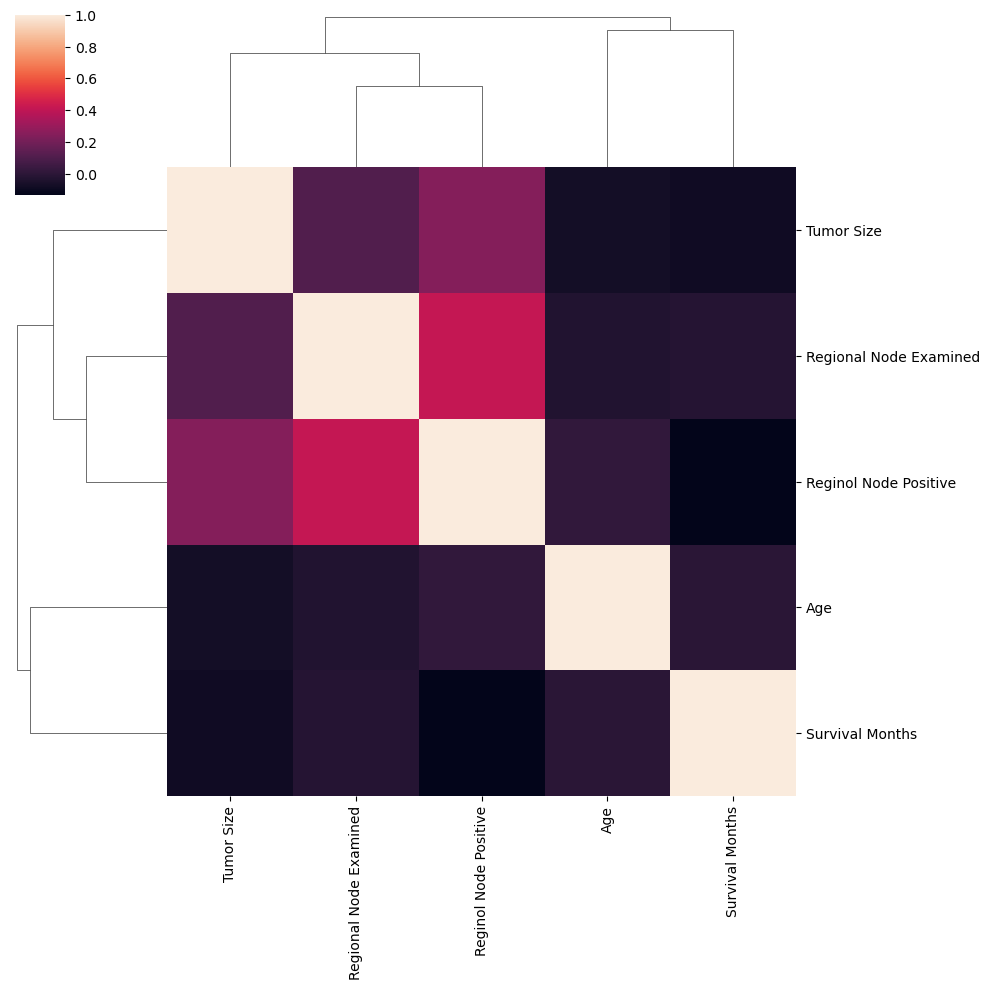

In [38]:
sns.clustermap(data=df.corr())

In [96]:
x=df.drop(['Status'],axis=1)
y=df['Status']

In [97]:
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size=0.2,random_state=42)

In [98]:
model=svm.SVC()

In [99]:
model.fit(X_train, y_train)

ValueError: could not convert string to float: 'T1'